In [1]:
import pandas as pd
import warnings 
# 用来忽略seaborn绘图库产生的warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


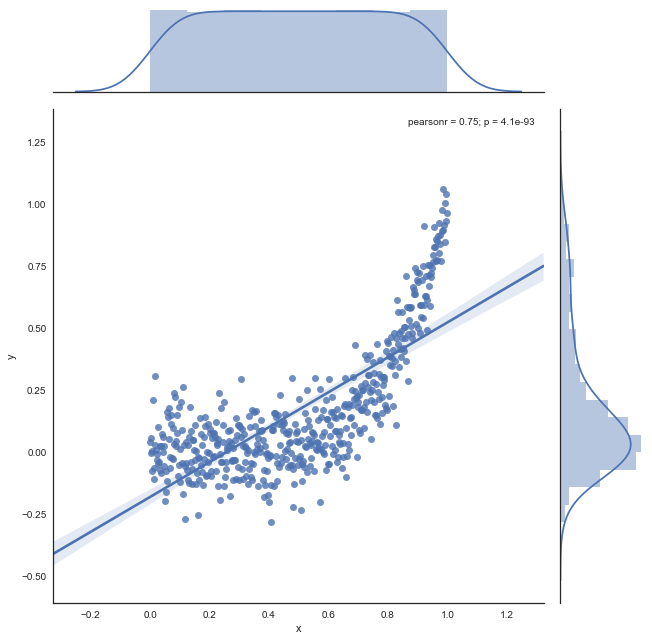

In [51]:
# 生成数据
import scipy as sp  
from scipy.stats import norm  

x = np.arange(0, 1, 0.002)  
y = norm.rvs(0, size=500, scale=0.1)  
y = y + x**5
df = pd.DataFrame()
df['x']=x
df['y']=y
df.head()
#plt.scatter(x, y, s=5,figsize=12)
#df..plot(figsize=(12,9))
sns.jointplot(x="x", y="y", data=df, kind='reg', size=9)

In [56]:
# 评价函数
''''' 均方误差根 '''  
def rmse(y_test, y):  
    return sp.sqrt(sp.mean((y_test - y) ** 2))  
  
''''' 与均值相比的优秀程度，介于[0~1]。0表示不如均值。1表示完美预测.这个版本的实现是参考scikit-learn官网文档  '''  
def R2(y_test, y_true):  
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()  
  
  
''''' 这是Conway&White《机器学习使用案例解析》里的版本 '''  
def R22(y_test, y_true):  
    y_mean = np.array(y_true)  
    y_mean[:] = y_mean.mean()  
    return 1 - rmse(y_test, y_true) / rmse(y_mean, y_true)  

level=1,rmse=0.18, R2=0.57, R22=0.34, clf.score=0.57
level=2,rmse=0.11, R2=0.83, R22=0.58, clf.score=0.83
level=5,rmse=0.10, R2=0.86, R22=0.62, clf.score=0.86
level=10,rmse=0.10, R2=0.86, R22=0.62, clf.score=0.86
level=20,rmse=0.10, R2=0.86, R22=0.63, clf.score=0.86
level=50,rmse=0.10, R2=0.87, R22=0.63, clf.score=0.87
level=100,rmse=0.10, R2=0.87, R22=0.63, clf.score=0.87


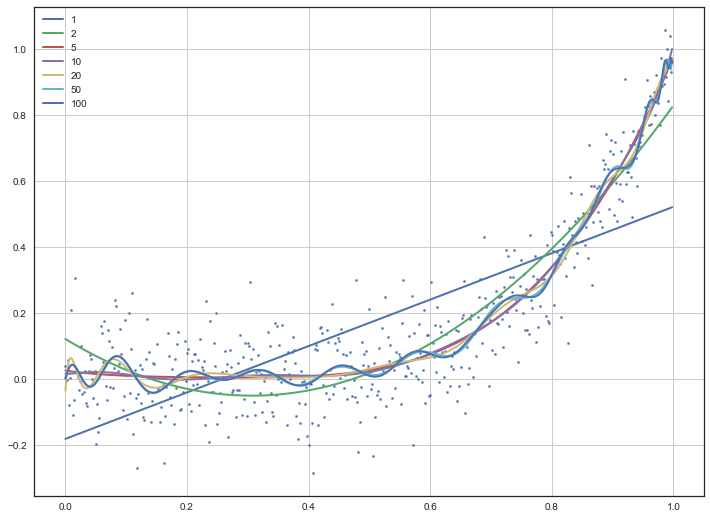

In [54]:
plt.figure(figsize=(12,9))
# 回归级数
degree = [1,2,5,10,20,50,100]
plt.scatter(x, y, s=5)

# 线性回归
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()

# 多项式回归
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures  
from sklearn import linear_model  
for d in degree:  
    clf = Pipeline([('poly', PolynomialFeatures(degree=d)),  
                    ('linear', LinearRegression(fit_intercept=False))])  
    clf.fit(x[:, np.newaxis], y)  
    y_test = clf.predict(x[:, np.newaxis])  
  
    # 拟合结果
    #print(clf.named_steps['linear'].coef_)  
    # 评价
    print('level=%d,rmse=%.2f, R2=%.2f, R22=%.2f, clf.score=%.2f' % 
       (d,
        rmse(y_test, y),  
        R2(y_test, y),  
        R22(y_test, y),  
        clf.score(x[:, np.newaxis], y)))      
       
    plt.plot(x, y_test, linewidth=2)  
       
plt.grid()  
plt.legend(degree, loc='upper left')  


In [55]:
# 结果评价
# 注意，次数过高，容易发生过拟合